In [124]:
import os

import matplotlib.pyplot as plt
%pylab inline
import numpy as np

from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.layers import DropoutLayer
from lasagne.layers import Conv2DLayer
from lasagne.layers import MaxPool2DLayer
from lasagne.nonlinearities import softmax
from lasagne.updates import adam
from lasagne.layers import get_all_params
import theano as T
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from nolearn.lasagne import objective
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
imagewidth = 40
def display(image, min = 0.0, max = 1.0):
    plt.imshow(image, cmap = plt.get_cmap('gray'), interpolation='nearest')
    plt.show()    

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [135]:
data = np.genfromtxt("../ColumnMatchData/match_data.csv", delimiter=',', names=True) 
data = np.array([list(i) for i in data]).astype(np.float32)

# print data
# print y[:10]


positive = data[data[:,7] == 1]
negative = data[data[:,7] != 1]
print len(positive), len(negative)
extra_positive = []

import random
while len(extra_positive) < len(negative):
    extra_positive.append(random.choice(positive))
    
positive = np.array(extra_positive)

data = np.concatenate((extra_positive, negative), axis = 0)
print data

y = data[:,7]
y = np.eye(2)[y.astype(np.int)].astype(np.float32)

x = data[:,[1,2,3,4,5,6,8,9,10,11,12]]
x[:,3] = x[:,3]/np.max(x[:,3])



print y
print np.mean(y[:,0])

396 5286
[[  4.31000000e+02   1.00000000e+00   0.00000000e+00 ...,   2.68011332e+00
    0.00000000e+00   7.14285731e-01]
 [  1.22000000e+03   1.00000000e+00   0.00000000e+00 ...,   1.79999995e+00
    0.00000000e+00   6.06060624e-02]
 [  4.33600000e+03   1.00000000e+00   0.00000000e+00 ...,   7.20000029e-01
    0.00000000e+00   4.70588237e-01]
 ..., 
 [  5.67500000e+03   1.00000000e+00   0.00000000e+00 ...,   1.50000000e+00
    0.00000000e+00   9.09090936e-02]
 [  5.67600000e+03   1.00000000e+00   0.00000000e+00 ...,   2.19892859e+00
    0.00000000e+00   9.09090936e-02]
 [  5.67700000e+03   1.00000000e+00   0.00000000e+00 ...,   1.48751628e+00
    0.00000000e+00   8.63636374e-01]]
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
0.5


training...


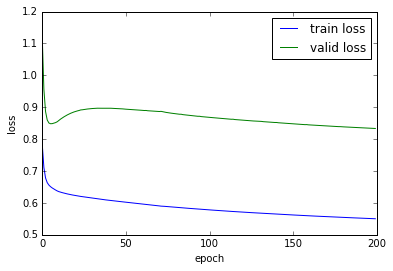

In [183]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('hidden', layers.DenseLayer),
#             ('hidden2', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
    # layer parameters:
    input_shape=(None, x.shape[-1]),
    hidden_num_units=10,
    hidden_nonlinearity = lasagne.nonlinearities.rectify,
#     hidden2_num_units=16,  
#     hidden2_nonlinearity = lasagne.nonlinearities.rectify,

    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=2, 

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=.0001,
    update_momentum=0.9,

    max_epochs=200,
    verbose=0,
     regression=True,
    objective_loss_function = lasagne.objectives.categorical_crossentropy
    )

    # Train the network
print("training...")

net1.fit(x, y)

# # Try the network on new data
# print("Feature vector (100-110): %s" % data['X_test'][0])
# print("Label: %s" % str(data['y_test'][0]))
# print("Predicted: %s" % str(net1.predict([data['X_test'][0]])))
from nolearn.lasagne.visualize import plot_loss
plot_loss(net1)
plt.show()
# 1.94568

In [70]:
print mse
# l = InputLayer(shape=(None, x.shape[1]))
# l = DenseLayer(l, num_units=len(np.unique(y)), nonlinearity=softmax)
# net = NeuralNet(l, update_learning_rate=0.01)
# net.fit(x, y)
# print(net.score(x, y))

NameError: name 'mse' is not defined

In [185]:
# import cPickle
# with open("../ColumnMatchData/model", 'wb') as f:
#     cPickle.dump(lasagne.layers.get_output(net1.get_all_layers()[2]), f)

# with open("../ColumnMatchData/model", 'rb') as f:
#     cPickle.load(f)
    
output = lasagne.layers.get_output(net1.get_all_layers()[-1], x).eval()
# print output[:10]
# print output[-10:]

one = output[y==0]
two = output[y==1]
print("===")
print np.mean(one)
print np.mean(two)
print np.min(one)
print np.min(two)
print np.max(one)
print np.max(two)

print len(one)
print len(two)

decisions = np.argmax(output, axis = 1)
print "=="

print 1.0*sum([int(decisions[i] == y[i, 1]) for i in range(len(y))])/len(data)*100

===
0.393242
0.606758
0.0273654
0.0179736
0.982026
0.972635
10572
10572
==
73.0609156262


In [145]:
# output = lasagne.layers.get_output(net1.get_all_layers()[2], [[1.0,1.0,1.0,1.0]]).eval()
print output

[[ 0.73225635  0.26774368]
 [ 0.72442335  0.27557665]
 [ 0.87017733  0.12982261]
 ..., 
 [ 0.84933615  0.15066379]
 [ 0.79265058  0.20734935]
 [ 0.86565357  0.13434643]]


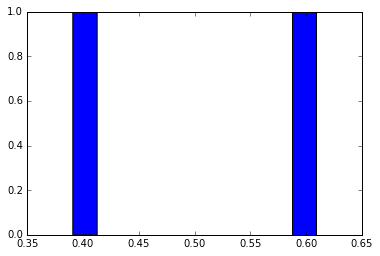

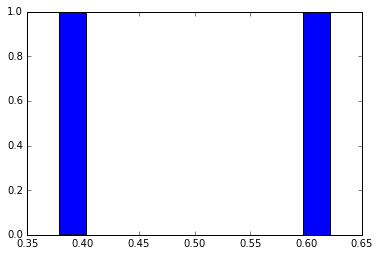

In [16]:
plt.hist((output[0,:]))
plt.show()

plt.hist((output[1,:]))
plt.show()